In [3]:
import numpy as np
from scipy import misc
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import cv2
import glob
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.image as matimage
%matplotlib inline 

X_train = []
y_train = []
X_test = []
y_test = []

for i in range(10):
    files = glob.glob ("mnist_png_data/training/%d/*.PNG" % i)
    for myFile in files:
        image =  misc.imread(myFile)
        X_train.append(image)
        y_train.append(i)
        
        
for i in range(10):
    files = glob.glob ("mnist_png_data/testing/%d/*.PNG" % i)
    for myFile in files:
        image =  misc.imread(myFile)
        X_test.append(image)
        y_test.append(i)

In [4]:
X_train_org = X_train
X_test_org = X_test
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

print("First shape of training data:", X_train.shape)
print("First shape of test data:", X_test.shape)

X_train = np.reshape(X_train, (60000,784))
X_test = np.reshape(X_test, (10000,784))

print("Training data size:", X_train.shape)
print("Testing data size:", X_test.shape)

print("Labels unique characters: ", np.unique(y_train))

First shape of training data: (60000, 28, 28)
First shape of test data: (10000, 28, 28)
Training data size: (60000, 784)
Testing data size: (10000, 784)
Labels unique characters:  [0 1 2 3 4 5 6 7 8 9]


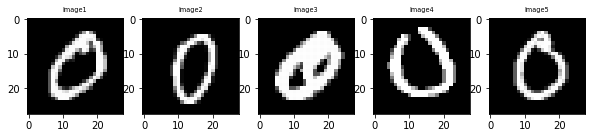

In [5]:
n_row = 1
n_col = 5
plt.figure(figsize=(10,8))
for i in list(range(n_row*n_col)):
    plt.subplot(n_row, n_col, i+1)
    plt.imshow(X_train[i,:].reshape(28,28), cmap="gray")
    title_text = "Image" + str(i+1)
    plt.title(title_text, size=6.5)

plt.show()

# Preprocessing Normalized all of the datasets

In [6]:
from sklearn.preprocessing import StandardScaler
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

C:\Users\Zoloo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


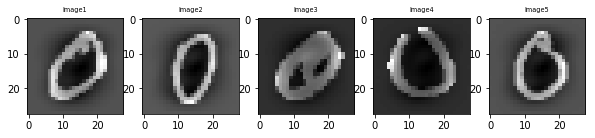

In [7]:
n_row = 1
n_col = 5
plt.figure(figsize=(10,8))
for i in list(range(n_row*n_col)):
    plt.subplot(n_row, n_col, i+1)
    plt.imshow(X_train[i,:].reshape(28,28), cmap="gray")
    title_text = "Image" + str(i+1)
    plt.title(title_text, size=6.5)

plt.show()

# Find eigenvectors and eigenvalues, compute covariance matrix

In [8]:
mean_vec = np.mean(X_train, axis=0)
cov_mat = np.cov(X_train.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
cov_mat.shape

(784, 784)

In [9]:
eig_pairs = [(np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key = lambda x: x[0], reverse=True)
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

In [10]:
add =0.0
for i in range(400):
    add+= var_exp[i]

print('first 400 components average variance: %.2f' % add)  

first 400 components average variance: 96.95


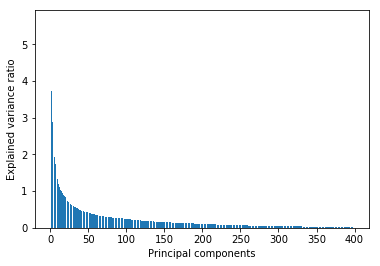

In [11]:
size = 400
plt.figure(figsize=(6,4))
plt.bar(range(size), var_exp[0:size], align='center');
plt.xlabel("Principal components")
plt.ylabel("Explained variance ratio");

# Using PCA reduce dimensionality 

In [12]:
from sklearn.decomposition import PCA

n_components = 400
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

In [13]:
eigenvalues = pca.components_.reshape(n_components, 28, 28)
eigenvalues = pca.components_
eigenvalues.shape

(400, 784)

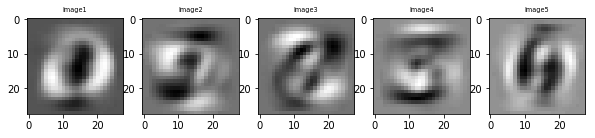

In [14]:
n_row = 1
n_col = 5
plt.figure(figsize=(10,8))
for i in list(range(n_row*n_col)):
    plt.subplot(n_row, n_col, i+1)
    plt.imshow(eigenvalues[i,:].reshape(28,28), cmap="gray")
    title_text = "Image" + str(i+1)
    plt.title(title_text, size=6.5)

plt.show()

# Classification 

In [15]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

# Gaussian classifier 

In [16]:
gNB = GaussianNB()
gNB.fit(X_train_pca,y_train)
nb_predict = gNB.predict(X_test_pca)

print(metrics.classification_report(y_test, nb_predict))
accuracy = metrics.accuracy_score(y_test, nb_predict)
average_accuracy = np.mean(y_test == nb_predict) * 100
print("The average_accuracy is {0:.1f}%".format(average_accuracy))

             precision    recall  f1-score   support

          0       0.27      0.75      0.40       980
          1       0.45      0.95      0.61      1135
          2       0.29      0.20      0.23      1032
          3       0.14      0.07      0.10      1010
          4       0.26      0.32      0.29       982
          5       0.14      0.06      0.09       892
          6       0.38      0.06      0.11       958
          7       0.32      0.12      0.17      1028
          8       0.27      0.25      0.26       974
          9       0.12      0.07      0.09      1009

avg / total       0.27      0.30      0.24     10000

The average_accuracy is 29.5%


# SVM classifier with default parameters 

In [17]:
svm = SVC()
svm.fit(X_train_pca,y_train)
svm_predict = svm.predict(X_test_pca)

print(metrics.classification_report(y_test, svm_predict))
accuracy = metrics.accuracy_score(y_test, svm_predict)
average_accuracy = np.mean(y_test == svm_predict) * 100
print("The average_accuracy is {0:.1f}%".format(average_accuracy))

             precision    recall  f1-score   support

          0       0.85      0.68      0.76       980
          1       0.94      0.67      0.78      1135
          2       0.37      0.60      0.46      1032
          3       0.40      0.37      0.39      1010
          4       0.37      0.27      0.31       982
          5       0.32      0.24      0.27       892
          6       0.88      0.65      0.75       958
          7       0.56      0.62      0.59      1028
          8       0.34      0.51      0.41       974
          9       0.36      0.40      0.38      1009

avg / total       0.54      0.51      0.51     10000

The average_accuracy is 50.6%


# MLP classifier with default parameters

In [18]:
MLP= MLPClassifier()
MLP.fit(X_train_pca,y_train)
mlp_predict = MLP.predict(X_test_pca)

print(metrics.classification_report(y_test, mlp_predict))
accuracy = metrics.accuracy_score(y_test, mlp_predict)
average_accuracy = np.mean(y_test == mlp_predict) * 100
print("The average_accuracy is {0:.1f}%".format(average_accuracy))

             precision    recall  f1-score   support

          0       0.75      0.66      0.70       980
          1       0.74      0.40      0.52      1135
          2       0.40      0.46      0.43      1032
          3       0.38      0.44      0.41      1010
          4       0.36      0.30      0.33       982
          5       0.17      0.19      0.18       892
          6       0.67      0.57      0.61       958
          7       0.47      0.62      0.54      1028
          8       0.26      0.31      0.28       974
          9       0.22      0.23      0.22      1009

avg / total       0.45      0.42      0.43     10000

The average_accuracy is 42.0%


# Preprocessin binarizer

In [30]:
from sklearn.preprocessing import Binarizer
binarizer = Binarizer()

In [34]:
train_binary = binarizer.fit_transform(X_train) 
test_binary = binarizer.fit_transform(X_test)
train_binary.shape

(60000, 784)

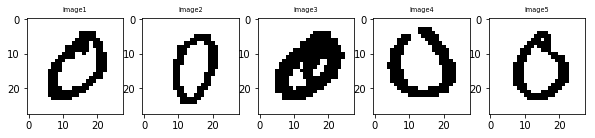

In [33]:
n_row = 1
n_col = 5
plt.figure(figsize=(10,8))
for i in list(range(n_row*n_col)):
    plt.subplot(n_row, n_col, i+1)
    plt.imshow(train_binary[i,:].reshape(28,28), cmap="binary")
    title_text = "Image" + str(i+1)
    plt.title(title_text, size=6.5)

plt.show()

# Gaussian classifier 

In [36]:
gNB = GaussianNB()
gNB.fit(train_binary,y_train)
nb_predict = gNB.predict(test_binary)

print(metrics.classification_report(y_test, nb_predict))
accuracy = metrics.accuracy_score(y_test, nb_predict)
average_accuracy = np.mean(y_test == nb_predict) * 100
print("The average_accuracy is {0:.1f}%".format(average_accuracy))

             precision    recall  f1-score   support

          0       0.76      0.87      0.81       980
          1       0.90      0.92      0.91      1135
          2       0.90      0.23      0.37      1032
          3       0.66      0.32      0.43      1010
          4       0.87      0.14      0.25       982
          5       0.50      0.04      0.07       892
          6       0.64      0.94      0.76       958
          7       0.87      0.25      0.39      1028
          8       0.28      0.69      0.39       974
          9       0.37      0.94      0.53      1009

avg / total       0.68      0.54      0.50     10000

The average_accuracy is 54.2%


In [37]:
svm = SVC()
svm.fit(train_binary,y_train)
svm_predict = svm.predict(test_binary)

print(metrics.classification_report(y_test, svm_predict))
accuracy = metrics.accuracy_score(y_test, svm_predict)
average_accuracy = np.mean(y_test == svm_predict) * 100
print("The average_accuracy is {0:.1f}%".format(average_accuracy))

             precision    recall  f1-score   support

          0       0.96      0.99      0.97       980
          1       0.97      0.99      0.98      1135
          2       0.95      0.94      0.94      1032
          3       0.93      0.94      0.93      1010
          4       0.93      0.95      0.94       982
          5       0.94      0.91      0.92       892
          6       0.95      0.97      0.96       958
          7       0.95      0.93      0.94      1028
          8       0.94      0.91      0.93       974
          9       0.94      0.91      0.93      1009

avg / total       0.95      0.95      0.95     10000

The average_accuracy is 94.6%


# MLP we use only one layer and 100 neurons

In [41]:
MLP= MLPClassifier()
MLP.fit(train_binary,y_train)
mlp_predict = MLP.predict(test_binary)

print(metrics.classification_report(y_test, mlp_predict))
accuracy = metrics.accuracy_score(y_test, mlp_predict)
average_accuracy = np.mean(y_test == mlp_predict) * 100
print("The average_accuracy is {0:.1f}%".format(average_accuracy))

             precision    recall  f1-score   support

          0       0.98      0.99      0.98       980
          1       0.99      0.99      0.99      1135
          2       0.98      0.97      0.97      1032
          3       0.98      0.98      0.98      1010
          4       0.97      0.98      0.97       982
          5       0.99      0.97      0.98       892
          6       0.98      0.98      0.98       958
          7       0.97      0.97      0.97      1028
          8       0.95      0.97      0.96       974
          9       0.97      0.96      0.96      1009

avg / total       0.97      0.97      0.97     10000

The average_accuracy is 97.5%
